In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter


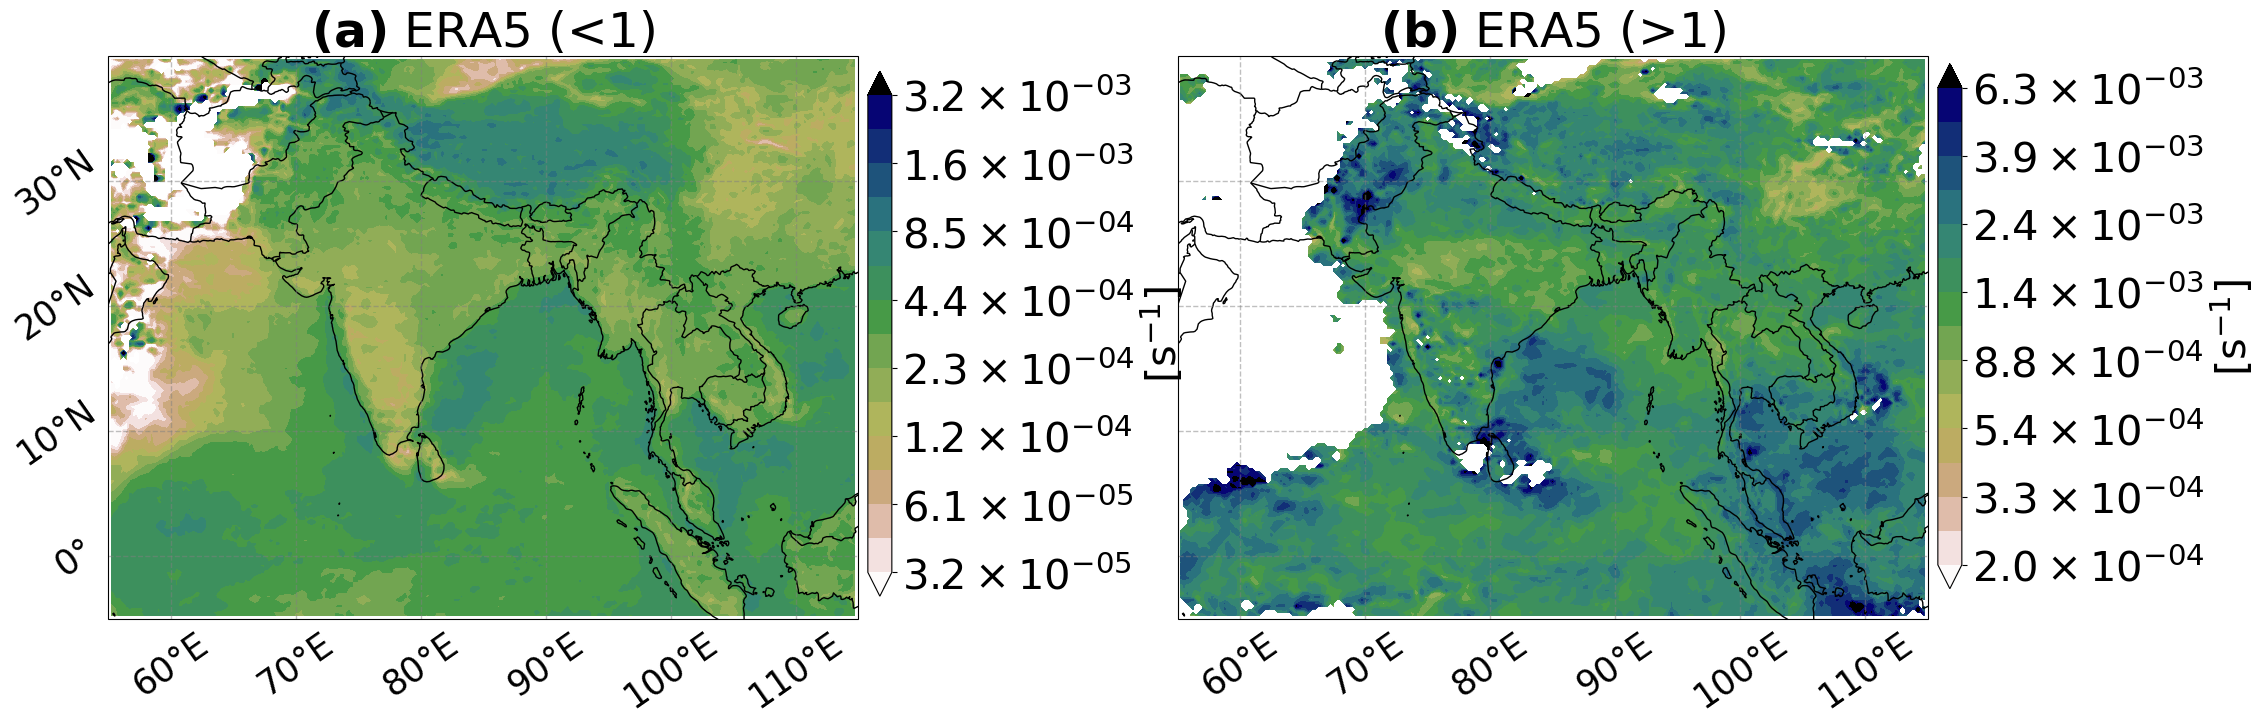

In [7]:
# File paths and data loading
basedir = '/xdisk/sylvia/temakgoale/DYAMOND/TIME_AVERAGING_CWP_FILTERED/'
ERA5_0001 = xr.open_dataset(basedir + 'ERA5_PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg.nc')['PRECEFF_TIMEAVG']
ERA5_1 = xr.open_dataset(basedir + 'ERA5_PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg.nc')['PRECEFF_TIMEAVG']

# Logarithmic color levels
levs = np.logspace(-4.50, -2.50, 15)
levs2 = np.logspace(-3.70, -2.20, 15)

# Scientific notation formatter
fmt = lambda x, pos: r'${} \times 10^{{{}}}$'.format(*'{:.1e}'.format(x).split('e'))


# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(20, 7.5), subplot_kw={'projection': ccrs.PlateCarree()})
titles = [r'$\bf{(a)}$ ERA5 (<1)', r'$\bf{(b)}$ ERA5 (>1)']
datasets = [(ERA5_0001, levs, 'gist_earth_r'), (ERA5_1, levs2, 'gist_earth_r')]

for ax, (data, levels, cmap), title in zip(axes, datasets, titles):
    im = ax.contourf(data.longitude, data.latitude, data, levels=levels, cmap=cmap, extend='both',
                     norm=mcolors.LogNorm(vmin=levels[0], vmax=levels[-1]))
    ax.set_title(title, size=35)
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels, gl.right_labels = False, False
    gl.bottom_labels, gl.left_labels = True, ax is axes[0]
    gl.xlabel_style, gl.ylabel_style = {'size': 25, 'rotation': 35}, {'size': 25, 'rotation': 35}

# Colorbars
for pos, im in zip([[0.405, 0.08, 0.012, 0.70], [0.94, 0.09, 0.012, 0.70]], [axes[0], axes[1]]):
    cbar = fig.colorbar(im.collections[0], cax=fig.add_axes(pos), orientation='vertical', format=FuncFormatter(fmt))
    cbar.set_label(r"[s$^{-1}$]", size=30)
    cbar.ax.tick_params(labelsize=30)

fig.subplots_adjust(wspace=0.32, left=0.01, right=0.95, bottom=0.05, top=0.8)
#plt.show()

#fig.subplots_adjust(wspace=0.32, left=0.01, right=0.95, bottom=0.05, top=0.8)
#plt.savefig('/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_3_ERA5_PRECEFF_CWP_filtered.png', dpi=100, bbox_inches='tight')
#plt.savefig("/home/u32/temakgoale/Precipitation_Efficiency_Paper/Figure_3_ERA5_PRECEEF_CWP_filtered.pdf", format="pdf",dpi=100, bbox_inches="tight")